___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (12,8)
pd.set_option('display.max_columns', 50)

In [47]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col="Unnamed: 0")
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


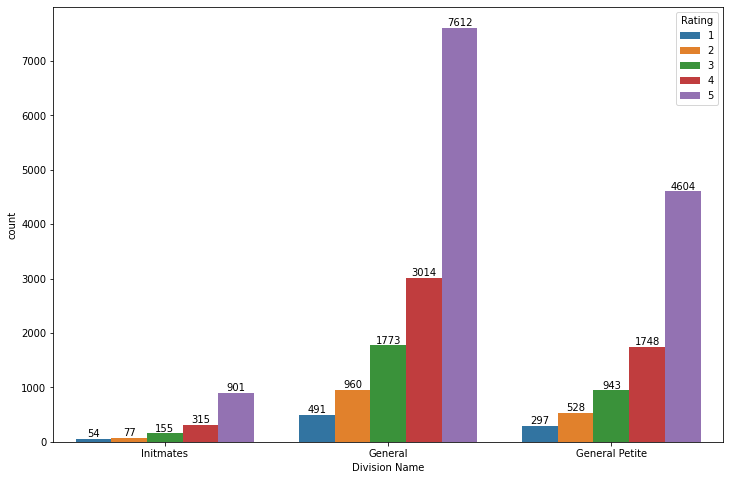

In [48]:
ax = sns.countplot(data = df, x ="Division Name", hue = "Rating")
for p in ax.containers:
    ax.bar_label(p)

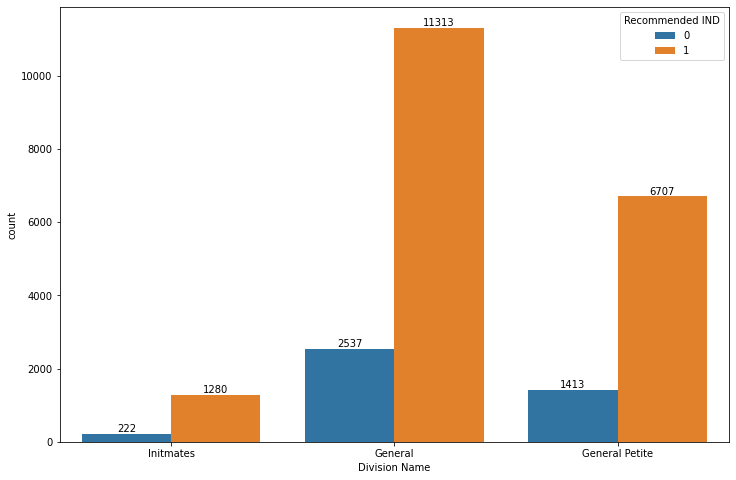

In [49]:
ax = sns.countplot(data = df, x ="Division Name", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

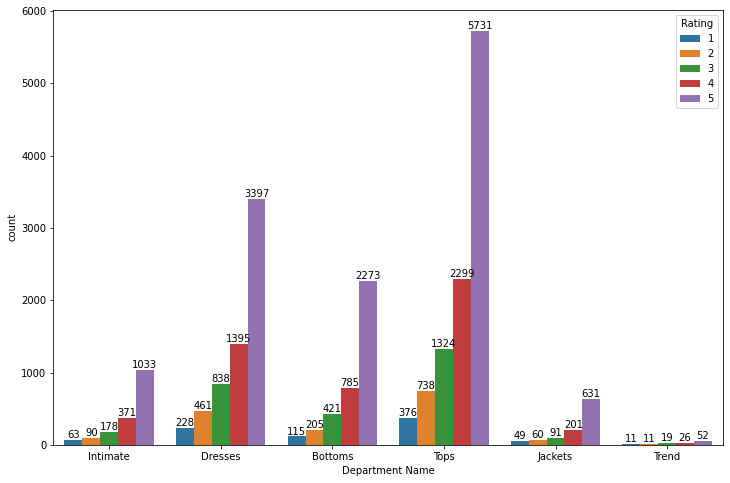

In [50]:
ax = sns.countplot(data = df, x ="Department Name", hue = "Rating")
for p in ax.containers:
    ax.bar_label(p)

### Data Wrangling

In [51]:
df["Review Text"].sample(19)

11389    I was excited to find this on sale because i j...
5913     Expected them to fit somewhat loose but actual...
23463    These pants overall are very comfortable, but ...
17238    Since i could not find this jacket in the stor...
16865    I'm a 34c and 136 lbs. i bought this in m in t...
14213    I took a chance on this one with free shipping...
2388     This is such a soft, comfortable and well fitt...
2873     Beautiful color and the fabric is very substan...
9005     Great tee! the color online is lighter and nic...
617      This is a great lounging dress or a great beac...
19138    I love this coat. it's everything i've been lo...
5907     Runs large and it also had a small hole in the...
10923    I'm 5'3" 115 lbs and ordered an xs petite. i h...
21625    I ordered both the petite and regular in the o...
1040     I just love this dress.  took me ordering a nu...
1546     These two blouses are probably my best purchas...
15428    I love love love these bright red jeans. they .

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [52]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [53]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [54]:
df2 =df[["Recommended IND", "Review Text"]]

In [55]:
df2.head()

,Recommended IND,Review Text
0,1,Absolutely wonderful - silky and sexy and comf...
1,1,Love this dress! it's sooo pretty. i happene...
2,0,I had such high hopes for this dress and reall...
3,1,"I love, love, love this jumpsuit. it's fun, fl..."
4,1,This shirt is very flattering to all due to th...


---
---


In [56]:
df = df2

In [57]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"}, inplace=True)

### Missing Value Detection

In [58]:
df.isnull().sum()/df.shape[0]*100

label    0.000000
text     3.597888
dtype: float64

In [59]:
df["text"].isna().value_counts()

False    22641
True       845
Name: text, dtype: int64

In [60]:
df.loc[pd.isna(df["text"]), :].index

Int64Index([   92,    93,    98,   135,   142,   165,   168,   192,   201,
              248,
            ...
            23080, 23120, 23127, 23166, 23224, 23258, 23301, 23303, 23470,
            23480],
           dtype='int64', length=845)

In [61]:
x = df.loc[pd.isna(df["text"]), :].index

In [62]:
df.iloc[92]

label      1
text     NaN
Name: 92, dtype: object

In [63]:
df.iloc[93]

label      1
text     NaN
Name: 93, dtype: object

In [64]:
df.shape


(23486, 2)

In [65]:
df.drop(x, inplace=True)

In [66]:
df.shape


(22641, 2)

In [67]:
df["text"].isna().value_counts()

False    22641
Name: text, dtype: int64

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



In [68]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [69]:
stop_words = stopwords.words('english')


### Tokenization, Noise Removal, Lexicon Normalization

In [71]:
X = df["text"]
y= df["label"]

In [72]:
X

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: text, Length: 22641, dtype: object

In [73]:
y

0        1
1        1
2        0
3        1
4        1
        ..
23481    1
23482    1
23483    0
23484    1
23485    1
Name: label, Length: 22641, dtype: int64

In [75]:
df.isna().any()

label    False
text     False
dtype: bool

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

<IPython.core.display.Javascript object>

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,2), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [79]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessory,accident,...,yet,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [81]:
positive_sentences = df[df["label"] == 1]["text"]
positive_sentences

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: text, Length: 18540, dtype: object

In [82]:
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
22       First of all, this is not pullover styling. th...
25       Loved the material, but i didnt really look at...
                               ...                        
23449    I tried these on because the color is really p...
23450    I wanted to love this jacket. so soft and grea...
23460    I purchased this for a very good price and i t...
23478    I was surprised at the positive reviews for th...
23483    This fit well, but the top was very see throug...
Name: text, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [83]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'Absolutely wonderful - silky and sexy and comfortable Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. I love, love, love this jumpsuit. it\'s fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!! I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet 

In [84]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress. Dress run

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [85]:
from wordcloud import WordCloud

In [86]:
wordcloud_positive = WordCloud(background_color="white", max_words =250)

In [87]:
wordcloud_positive.generate(positive_words)

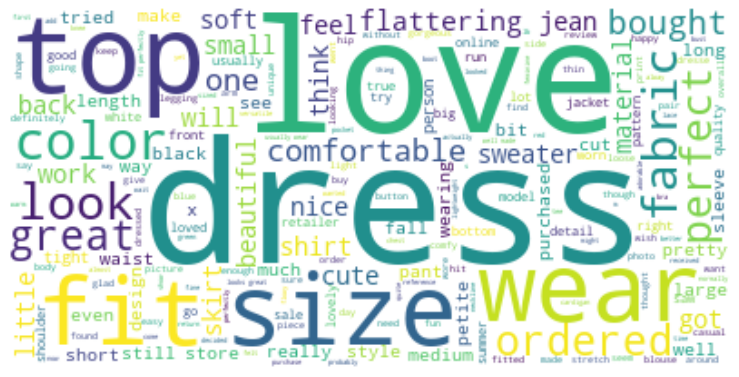

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

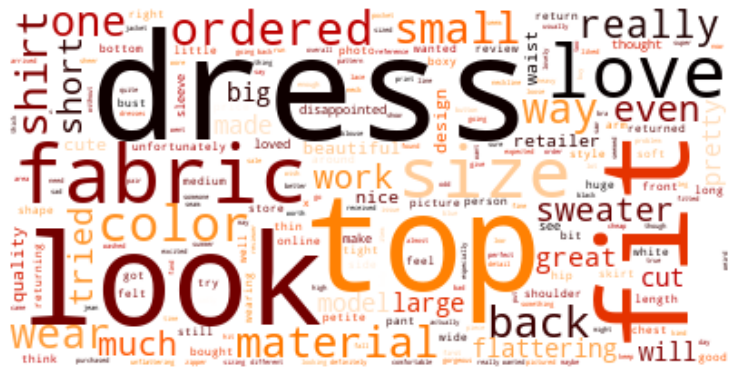

In [89]:
wordcloud_negative = WordCloud(background_color="white", max_words=250, colormap='gist_heat')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X = df["text"]
y= df["label"]

In [92]:
y = y.map({0:1, 1:0})

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [96]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [97]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,00,000,00p,02,03,03dd,04,06,0dd,0p,0petite,0r,0verall,0xs,10,100,1000,100lb,100lbs,101,102,102lbs,103,103lb,103lbs,...,zara,zed,zero,zeros,zig,zigzag,zigzagging,zillion,zip,zipepr,ziploc,zipped,zipper,zippered,zippers,zippie,zipping,zips,zombie,zone,zoolander,zoom,zooming,zuma,ã¼ber
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [100]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,00,000,00p,02,03,03dd,04,06,0dd,0p,0petite,0r,0verall,0xs,10,100,1000,100lb,100lbs,101,102,102lbs,103,103lb,103lbs,...,zara,zed,zero,zeros,zig,zigzag,zigzagging,zillion,zip,zipepr,ziploc,zipped,zipper,zippered,zippers,zippie,zipping,zips,zombie,zone,zoolander,zoom,zooming,zuma,ã¼ber
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.219964,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [102]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [103]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [104]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [105]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3302  407]
 [ 154  666]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3709
           1       0.62      0.81      0.70       820

    accuracy                           0.88      4529
   macro avg       0.79      0.85      0.81      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     14831
           1       0.76      0.98      0.86      3281

    accuracy                           0.94     18112
   macro avg       0.88      0.96      0.91     18112
weighted avg       0.95      0.94      0.94     18112



In [106]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8755522115889773

 precision-0          score for count : 0.9508223737383241

 recall-0             score for count : 0.8942751452672061

 f1-0                 score for count : 0.9216751080739108

 precision-1          score for count : 0.6235332517572714

 recall-1             score for count : 0.7909185262065387

 f1-1                 score for count : 0.6972626488994897



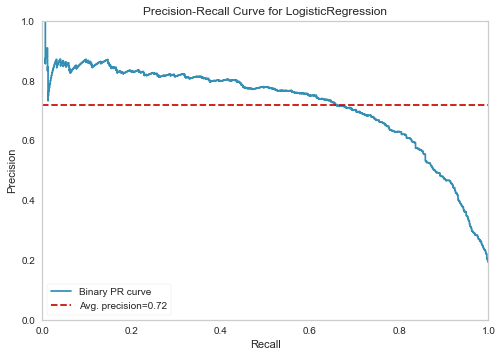

In [107]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [108]:
log_AP_count = viz.score_

### TF-IDF

In [109]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [110]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3121  588]
 [  99  721]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3709
           1       0.55      0.88      0.68       820

    accuracy                           0.85      4529
   macro avg       0.76      0.86      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14831
           1       0.57      0.90      0.70      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.88      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [111]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8706929568262629

 precision-0          score for tfidf : 0.9676540392254191

 recall-0             score for tfidf : 0.8712148282511774

 f1-0                 score for tfidf : 0.916887171230481

 precision-1          score for tfidf : 0.5989685248834205

 recall-1             score for tfidf : 0.8683334568907999

 f1-1                 score for tfidf : 0.7088160441187724



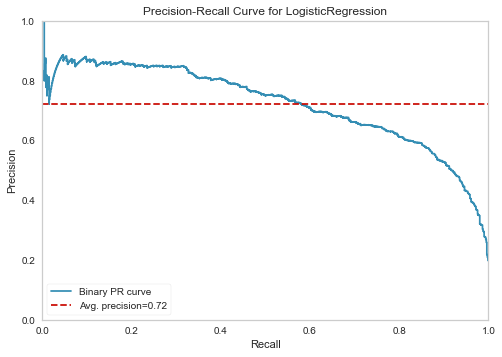

In [112]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [113]:
log_AP_tfidf = viz.score_

## Naive Bayes 

### Countvectorizer

In [114]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_count,y_train)

MultinomialNB()

In [115]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3433  276]
 [ 220  600]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3709
           1       0.68      0.73      0.71       820

    accuracy                           0.89      4529
   macro avg       0.81      0.83      0.82      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     14831
           1       0.73      0.81      0.77      3281

    accuracy                           0.91     18112
   macro avg       0.84      0.87      0.86     18112
weighted avg       0.92      0.91      0.91     18112



In [116]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_count_rec = scores
    elif i == "f1-1":
        nb_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.884275759005245

 precision-0          score for count : 0.9370017412826709

 recall-0             score for count : 0.920571872052171

 f1-0                 score for count : 0.9287071553767678

 precision-1          score for count : 0.6675751812996353

 recall-1             score for count : 0.7202072058714507

 f1-1                 score for count : 0.6928045865167144



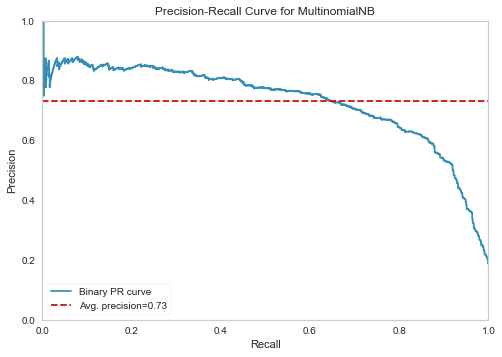

In [117]:
viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [118]:
nb_AP_count = viz.score_

### TF-IDF

In [119]:
nb = BernoulliNB()
nb.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [120]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3439  270]
 [ 285  535]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3709
           1       0.66      0.65      0.66       820

    accuracy                           0.88      4529
   macro avg       0.79      0.79      0.79      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     14831
           1       0.71      0.75      0.73      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.84      0.83     18112
weighted avg       0.90      0.90      0.90     18112



In [121]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_tfidf_rec = scores
    elif i == "f1-1":
        nb_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8698102898280438

 precision-0          score for tfidf : 0.9250334126136293

 recall-0             score for tfidf : 0.9151777648934102

 f1-0                 score for tfidf : 0.9200668106718825

 precision-1          score for tfidf : 0.6347334268643298

 recall-1             score for tfidf : 0.6647295944843947

 f1-1                 score for tfidf : 0.6492240100704492



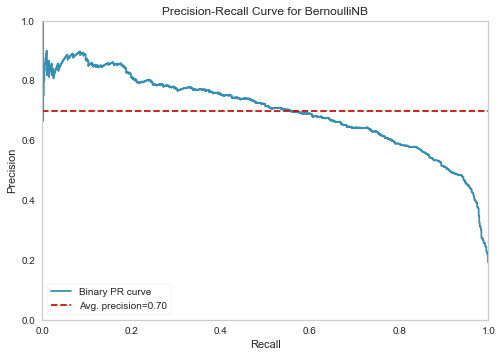

In [122]:
viz = PrecisionRecallCurve(
    BernoulliNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [123]:
nb_AP_tfidf = viz.score_

## Support Vector Machine (SVM)

### Countvectorizer

In [124]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [125]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3252  457]
 [ 130  690]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3709
           1       0.60      0.84      0.70       820

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     14831
           1       0.68      0.95      0.79      3281

    accuracy                           0.91     18112
   macro avg       0.83      0.93      0.87     18112
weighted avg       0.93      0.91      0.92     18112



In [126]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.87444794077888

 precision-0          score for count : 0.9613717450695706

 recall-0             score for count : 0.8821380860897904

 f1-0                 score for count : 0.9200315710399698

 precision-1          score for count : 0.61208184148927

 recall-1             score for count : 0.8396878938394247

 f1-1                 score for count : 0.7079015808008753



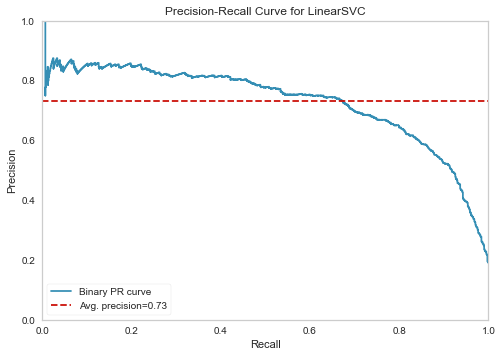

In [127]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [128]:
svc_AP_count = viz.score_

### TD-IDF

In [129]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [130]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3108  601]
 [  96  724]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3709
           1       0.55      0.88      0.68       820

    accuracy                           0.85      4529
   macro avg       0.76      0.86      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     14831
           1       0.57      0.90      0.70      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.88      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [131]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8473934125889981

 precision-0          score for tfidf : 0.9675575417168641

 recall-0             score for tfidf : 0.841884347856116

 f1-0                 score for tfidf : 0.9003325112034709

 precision-1          score for tfidf : 0.5498340988411612

 recall-1             score for tfidf : 0.8722931648009491

 f1-1                 score for tfidf : 0.6743980631234601



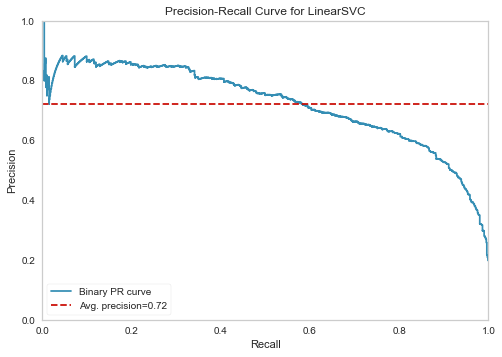

In [132]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [133]:
svc_AP_tfidf = viz.score_

## Random Forest

### Countvectorizer

In [134]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [135]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3247  462]
 [ 177  643]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3709
           1       0.58      0.78      0.67       820

    accuracy                           0.86      4529
   macro avg       0.77      0.83      0.79      4529
weighted avg       0.88      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     14831
           1       0.67      0.90      0.76      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.90      0.85     18112
weighted avg       0.92      0.90      0.91     18112



In [136]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8587123940891022

 precision-0          score for count : 0.9476443145720147

 recall-0             score for count : 0.8758678318335565

 f1-0                 score for count : 0.9103272134922247

 precision-1          score for count : 0.5821235604554963

 recall-1             score for count : 0.7811624286455631

 f1-1                 score for count : 0.6669993165001887



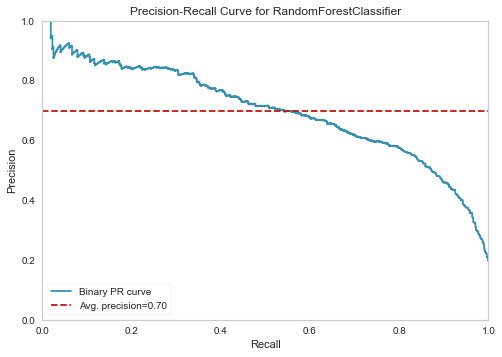

In [137]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [138]:
rf_AP_count = viz.score_

### TF-IDF

In [139]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [140]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3197  512]
 [ 173  647]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3709
           1       0.56      0.79      0.65       820

    accuracy                           0.85      4529
   macro avg       0.75      0.83      0.78      4529
weighted avg       0.88      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     14831
           1       0.63      0.90      0.74      3281

    accuracy                           0.89     18112
   macro avg       0.80      0.89      0.83     18112
weighted avg       0.91      0.89      0.89     18112



In [141]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8489400377628498

 precision-0          score for tfidf : 0.9453722727993034

 recall-0             score for tfidf : 0.8655514973836453

 f1-0                 score for tfidf : 0.9036915727533235

 precision-1          score for tfidf : 0.5602078596013242

 recall-1             score for tfidf : 0.7738527689228261

 f1-1                 score for tfidf : 0.6498509986431829



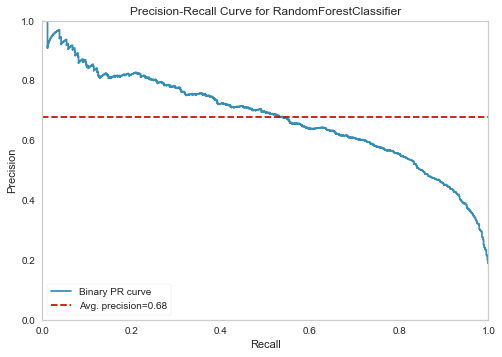

In [142]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [143]:
rf_AP_tfidf = viz.score_

## Ada Boosting

### Countvectorizer

In [144]:
# from sklearn.ensemble import AdaBoostClassifier
# ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
# ada.fit(X_train_count, y_train)

In [145]:
# print("Ada MODEL")
# eval(ada, X_train_count, X_test_count)

In [146]:
# custom_scorer = {'accuracy': make_scorer(accuracy_score),
#                  'precision-0': make_scorer(precision_score, pos_label=0),
#                  'recall-0': make_scorer(recall_score, pos_label=0),
#                  'f1-0': make_scorer(f1_score, pos_label=0),
#                  'precision-1': make_scorer(precision_score, pos_label=1),
#                  'recall-1': make_scorer(recall_score, pos_label=1),
#                  'f1-1': make_scorer(f1_score, pos_label=1)
#                  }

# for i, j in custom_scorer.items():
#     model =AdaBoostClassifier(n_estimators= 500, random_state = 42)
#     scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
#     if i == "recall-1":
#         ada_count_rec = scores
#     elif i == "f1-1":
#         ada_count_f1 = scores
#     print(f" {i:20} score for count : {scores}\n")

In [147]:
# viz = PrecisionRecallCurve(
#     AdaBoostClassifier(n_estimators= 500, random_state = 42),
#     classes=ada.classes_,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train_count,y_train)
# viz.score(X_test_count, y_test)
# viz.show();

In [148]:
# ada_AP_count = viz.score_

### TF-IDF

In [149]:
# ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
# ada.fit(X_train_tf_idf, y_train)

In [150]:
# print("Ada MODEL")
# eval(ada, X_train_tf_idf, X_test_tf_idf)

In [151]:
# custom_scorer = {'accuracy': make_scorer(accuracy_score),
#                  'precision-0': make_scorer(precision_score, pos_label=0),
#                  'recall-0': make_scorer(recall_score, pos_label=0),
#                  'f1-0': make_scorer(f1_score, pos_label=0),
#                  'precision-1': make_scorer(precision_score, pos_label=1),
#                  'recall-1': make_scorer(recall_score, pos_label=1),
#                  'f1-1': make_scorer(f1_score, pos_label=1)
#                  }

# for i, j in custom_scorer.items():
#     model =AdaBoostClassifier(n_estimators= 500, random_state = 42)
#     scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
#     if i == "recall-1":
#         ada_tfidf_rec = scores
#     elif i == "f1-1":
#         ada_tfidf_f1 = scores
#     print(f" {i:20} score for tfidf : {scores}\n")

In [152]:
# viz = PrecisionRecallCurve(
#     AdaBoostClassifier(n_estimators= 500, random_state = 42),
#     classes=ada.classes_,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train_tf_idf,y_train)
# viz.score(X_test_tf_idf, y_test)
# viz.show();

In [153]:
# ada_AP_tfidf = viz.score_

## DL modeling

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tokenization

In [155]:
X = df['text'].values
y = df['label'].map({0:1, 1:0}).values

In [156]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 

In [157]:
tokenizer.fit_on_texts(X)

### Creating word index

In [158]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [159]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [160]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [161]:
X[100]

"The fabric felt cheap and i didn't find it to be a flattering top. for reference i am wearing a medium in the photos and my measurements are 38-30-40."

In [162]:
print(X_num_tokens[100])

[1, 45, 267, 489, 3, 2, 124, 221, 5, 8, 29, 4, 58, 25, 12, 330, 2, 38, 141, 4, 97, 9, 1, 451, 3, 17, 1506, 27, 920, 691, 927]


In [163]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

<IPython.core.display.Javascript object>

### Maximum number of tokens for all documents¶

In [164]:
num_tokens.mean()

60.60699615741354

In [165]:
num_tokens.max()

116

In [166]:
num_tokens.argmax()

16263

In [167]:
X[15417]

'So cute and comfy. great fit. i bought them in green and they look great with wedges, sneakers or sandals. dress up or down. pair with a t-shirt and cotton blazer--adorable!'

In [168]:
max_tokens = 106

In [169]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9840554745815114

### Fixing token counts of all documents (pad_sequences)

In [170]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [171]:
X_pad.shape

(22641, 106)

### Train Set Split

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
from keras.layers import Bidirectional

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

### Modeling

In [175]:
model = Sequential()

In [176]:
embedding_size = 100

In [177]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [178]:
model.add(Bidirectional(GRU(units=48, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=48, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=48)))
model.add(Dense(1, activation='sigmoid'))

In [179]:
optimizer = Adam(lr=0.004)

In [180]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [181]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 106, 100)         1500000   
                                                                 
 bidirectional (Bidirectiona  (None, 106, 96)          43200     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 106, 96)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 106, 96)          42048     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 106, 96)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 96)               4

In [182]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 3, restore_best_weights=True)

In [183]:
pd.Series(y_train).value_counts(normalize=True)

0    0.818856
1    0.181144
dtype: float64

In [184]:
weights = {0:19, 1:81}

In [185]:
model.fit(X_train, y_train, epochs=25, batch_size=128, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
160/160 [==============================] - 146s 849ms/step - loss: 13.2447 - recall: 0.8055 - val_loss: 0.2898 - val_recall: 0.8220
Epoch 2/25
160/160 [==============================] - 131s 818ms/step - loss: 7.9437 - recall: 0.9155 - val_loss: 0.4166 - val_recall: 0.9073
Epoch 3/25
160/160 [==============================] - 135s 847ms/step - loss: 5.6845 - recall: 0.9515 - val_loss: 0.3865 - val_recall: 0.8805
Epoch 4/25
160/160 [==============================] - 118s 738ms/step - loss: 4.0138 - recall: 0.9745 - val_loss: 0.3567 - val_recall: 0.8366
Epoch 4: early stopping


In [186]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,13.244659,0.805473,0.289760,0.821951
1,7.943677,0.915470,0.416621,0.907317
2,5.684487,0.951504,0.386493,0.880488
3,4.013785,0.974533,0.356746,0.836585


<AxesSubplot:>

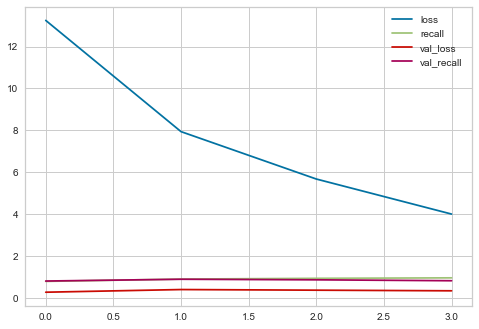

In [187]:
model_loss.plot()

In [188]:
model.evaluate(X_train, y_train)

637/637 [==============================] - 18s 28ms/step - loss: 0.2315 - recall: 0.9046


[0.23152312636375427, 0.9046328663825989]

In [189]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 2s 27ms/step - loss: 0.2898 - recall: 0.8220


[0.28976044058799744, 0.8219512104988098]

In [190]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 19s 28ms/step
[[15174  1511]
 [  352  3339]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     16685
           1       0.69      0.90      0.78      3691

    accuracy                           0.91     20376
   macro avg       0.83      0.91      0.86     20376
weighted avg       0.93      0.91      0.91     20376



In [191]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 2s 33ms/step
[[1673  182]
 [  73  337]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1855
           1       0.65      0.82      0.73       410

    accuracy                           0.89      2265
   macro avg       0.80      0.86      0.83      2265
weighted avg       0.90      0.89      0.89      2265



In [192]:
from sklearn.metrics import precision_recall_curve, average_precision_score

71/71 [==============================] - 2s 31ms/step


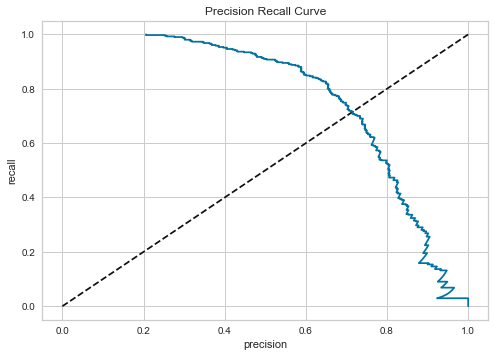

In [193]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [194]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [195]:
!pip install transformers

### Tokenization

In [196]:
import numpy as np
import pandas as pd

In [197]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

max_len = 0

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  162


In [198]:
def transformation(X):
  # set array dimensions
  seq_len = 162
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids']
      Xmask[i, :] = tokens['attention_mask']
  return Xids, Xmask

In [199]:
Xids, Xmask = transformation(X)

In [200]:
labels = y.reshape(-1,1)
labels

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

### Transformation text to tensor

In [201]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels)) #tf.data.Dataset.from_tensors((Xids, Xmask, labels))

def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)

In [202]:
batch_size = 16
length = len(X)
# shuffle and batch
# fit into a batch of 16
dataset = dataset.shuffle(length, reshuffle_each_iteration=False).batch(batch_size, drop_remainder=True)

### Train test split

In [203]:
# set split size (90% training data) and calculate training set size
split = 0.9
size = int(len(dataset)*split) #int((Xids.shape[0]/batch_size)*split)

# get training and validation sets
train_ds = dataset.take(size)
val_ds = dataset.skip(size)

### AdamW optimization

### Creating Model

In [204]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(80, activation='relu')(embeddings) 
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

In [179]:
with strategy.scope():
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

NameError: name 'strategy' is not defined

In [ ]:
model3.summary()

In [ ]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=1)

### Model evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred)) 

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

In [ ]:
BERT_without_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test, y_pred)
BERT_without_weighted_rec = recall_score(y_test, y_pred)

### BERT Model with Weighted

In [ ]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(80, activation='relu')(embeddings) 
    x = tf.keras.layers.Dropout(0.2, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
with strategy.scope():
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5) #3e-5, 2e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  precision = tf.keras.metrics.Precision()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[precision])

In [ ]:
pd.Series(y).value_counts(normalize=True)

In [ ]:
weights = {0:0.2, 1:0.8}

In [ ]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=1, class_weight=weights)

In [ ]:
y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred)) 

In [ ]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test, y_pred_proba)

In [ ]:
BERT_with_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test, y_pred)
BERT_with_weighted_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1, BERT_without_weighted_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec, BERT_without_weighted_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP, BERT_without_weighted_AP]})

def labels(ax):
                        
     for p in ax.patches:
        ax.bar_label(ax.containers[0],fmt="%.3f")
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___